# Ciencia de Datos 2021

### Alan Reyes-Figueroa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

# Spectral Clustering

In [2]:
# construimos imagen sintética

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

img = circle1 + circle2 + circle3 + circle4

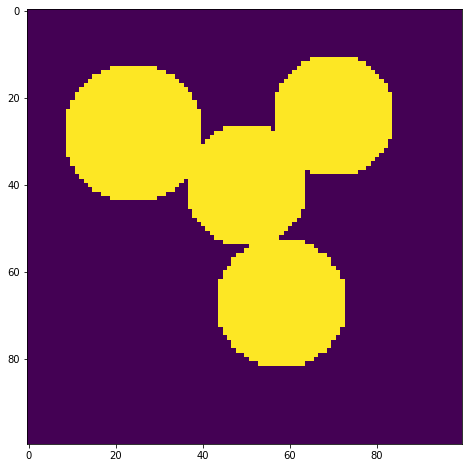

In [3]:
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()

In [4]:
# define mask
mask = img.astype(bool)

# adding noise
img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

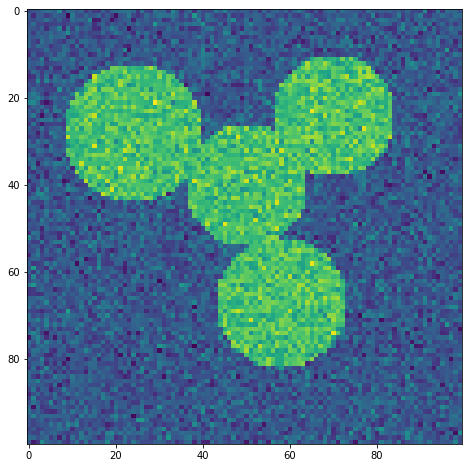

In [5]:
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()

In [6]:
# convert image into a graph
# edges = value of the gradient

graph = image.img_to_graph(img, mask=mask)

In [7]:
# take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi

graph.data = np.exp(-graph.data / graph.data.std())

In [8]:
# Force the solver to be arpack, since amg is numerically
# unstable on this example

labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

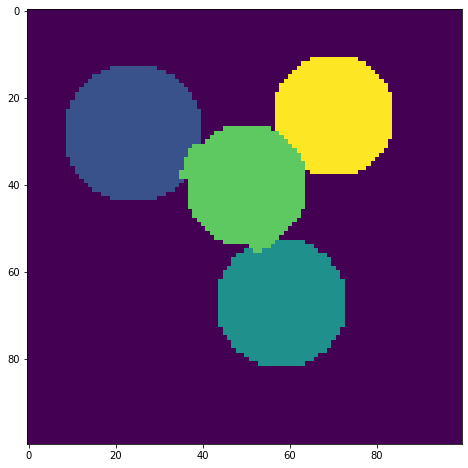

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(label_im)
plt.show()

# Ejemplo con 2 círculos

In [10]:
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

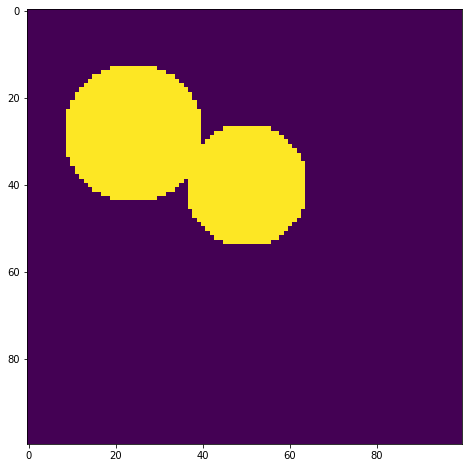

In [11]:
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()

In [12]:
# add noise
img += 1 + 0.2 * np.random.randn(*img.shape)

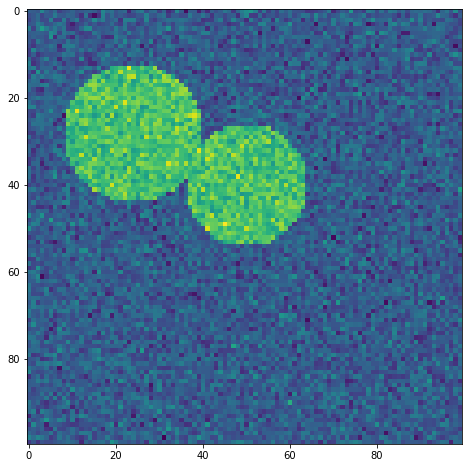

In [13]:
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()

In [14]:
graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

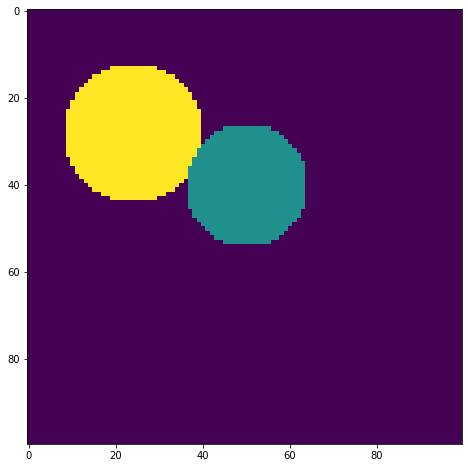

In [15]:
plt.figure(figsize=(8,8))
plt.imshow(label_im)
plt.show()